### 1. Importing libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


### 2. Loading the data

In [110]:
#loading the dataset
df = pd.read_csv("Train.csv")


In [111]:
# first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
# data shape
print(" Training :",df.shape)


 Training : (8523, 12)


In [112]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [113]:
# get the number of missing datapoints per column

df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

In [116]:
# Replace missing weights with the median weight of similar item types

df["Item_Weight"] = df["Item_Weight"].fillna(df.groupby("Item_Type")["Item_Weight"].transform("median"))


In [117]:
# Fill missing Outlet_Size values using the most common size within the same Outlet_Type
df["Outlet_Size"] = df["Outlet_Size"].fillna(df.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x: x.mode()[0]))


In [118]:
df.isnull().sum()
#bigmart_df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [119]:
df.duplicated().any()


False

In [120]:
# statistical 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.813390,4.241384,4.555,9.310000,12.850000,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


we can remove some useless columns


In [146]:
df.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 3.Univariate Analysis¶


Numeric comumns

In [122]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [129]:
def plot_numeric(df, column):
    plt.figure(figsize=(12,5))

    # histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column])
    plt.title(f"Histogram of {column}")

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

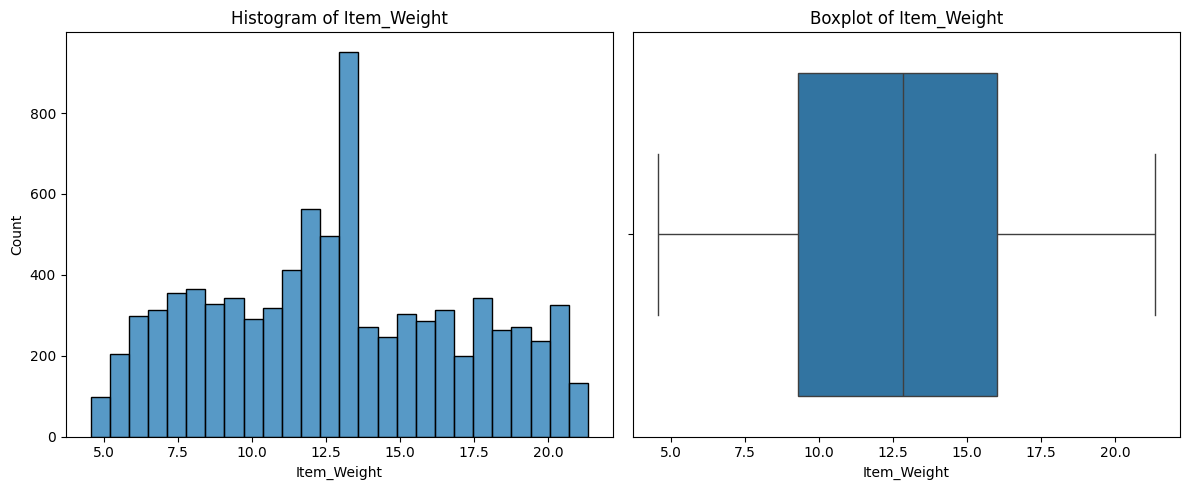

In [131]:
plot_numeric(df,"Item_Weight")

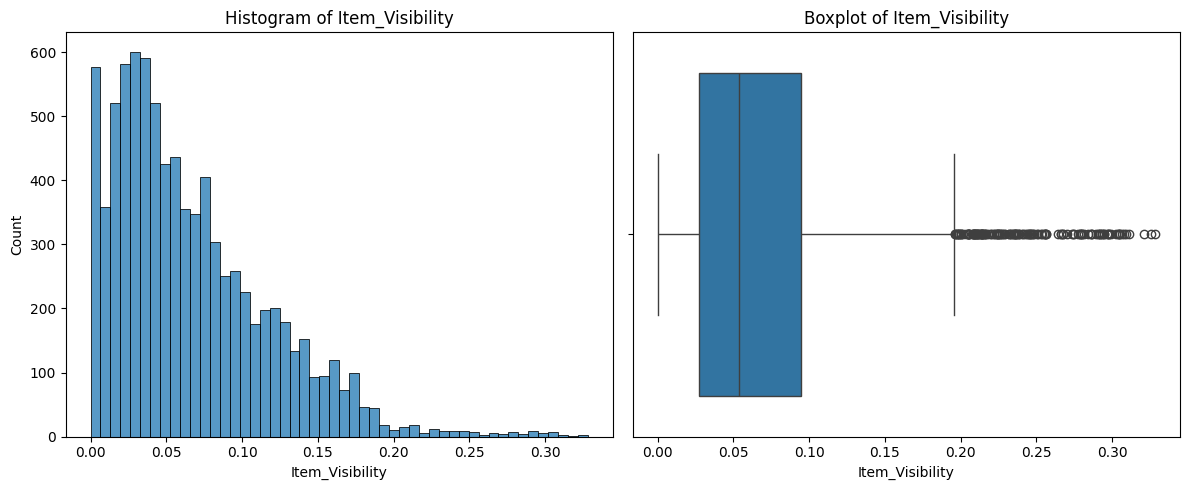

In [132]:
plot_numeric(df,"Item_Visibility")

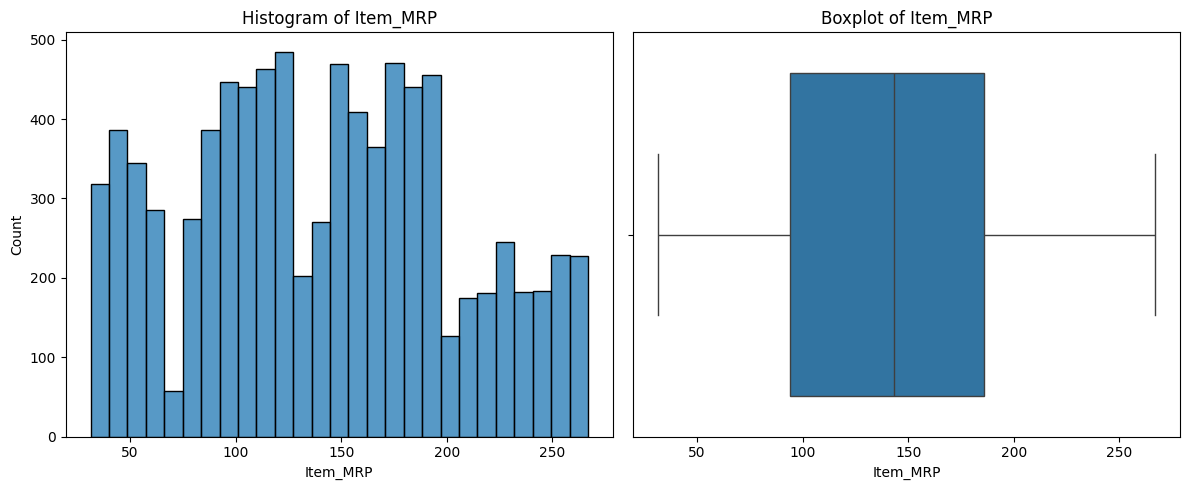

In [134]:
plot_numeric(df,"Item_MRP")

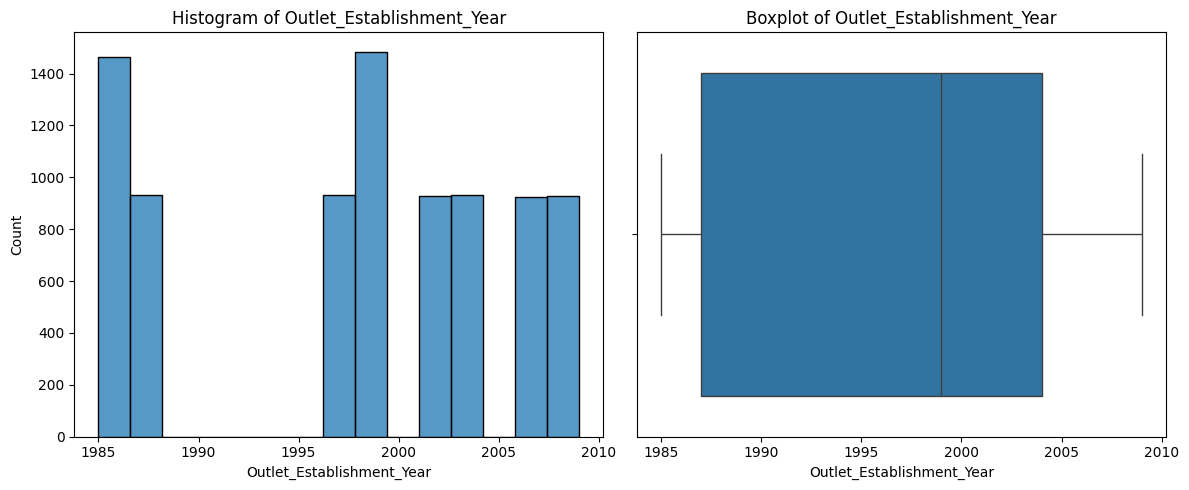

In [135]:
plot_numeric(df,"Outlet_Establishment_Year")

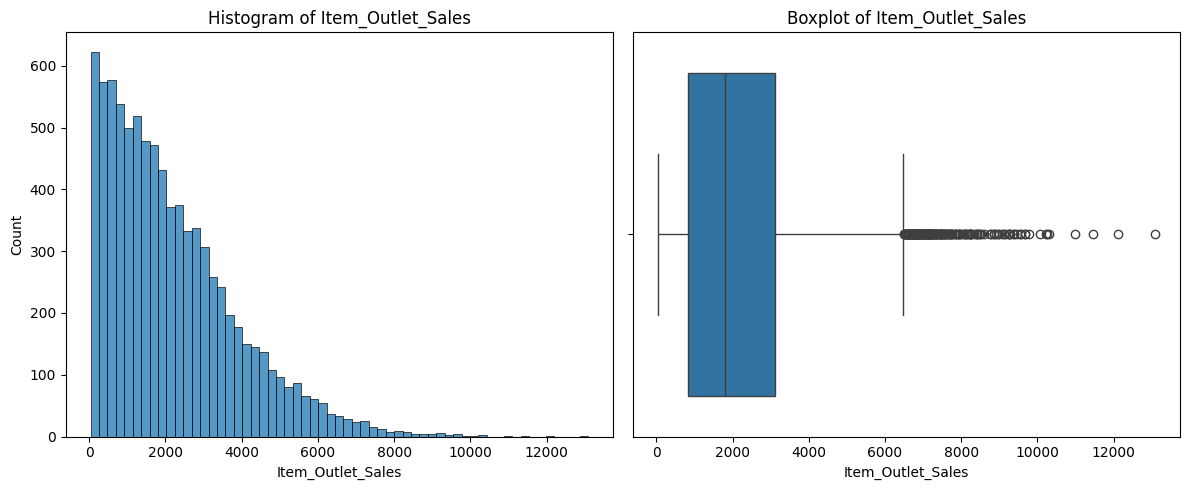

In [136]:
plot_numeric(df,"Item_Outlet_Sales")

Categorical culomns

In [147]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [138]:
for col in cat_cols:
    print(col, "->", df[col].nunique())
    print(df[col].value_counts().head(10))
    print("-"*40)


Item_Identifier -> 1559
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: count, dtype: int64
----------------------------------------
Item_Fat_Content -> 5
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
----------------------------------------
Item_Type -> 16
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64
----------------------------------------
Outlet_Identifier -> 10
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count,

In [139]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat", "low fat": "Low Fat",
    "reg": "Regular"
})


In [141]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Categorical culomns

In [150]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [143]:
def plot_category_counts(df, col, top_n=15):
    plt.figure(figsize=(8,4))
    order = df[col].value_counts().head(top_n).index
    sns.countplot(data=df, x=col, order=order)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Countplot of {col} (top {top_n})")
    plt.tight_layout()
    plt.show()

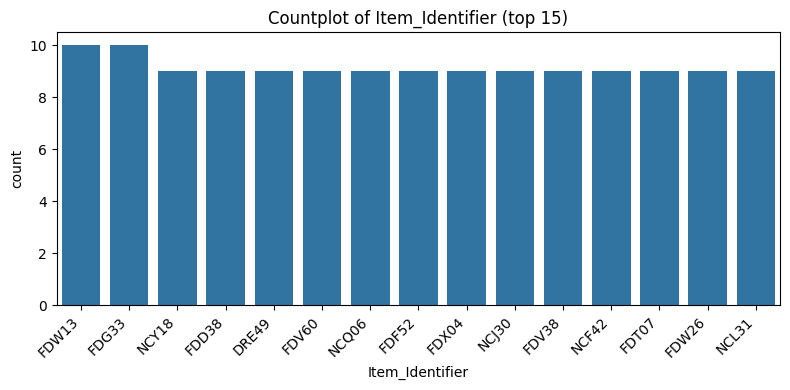

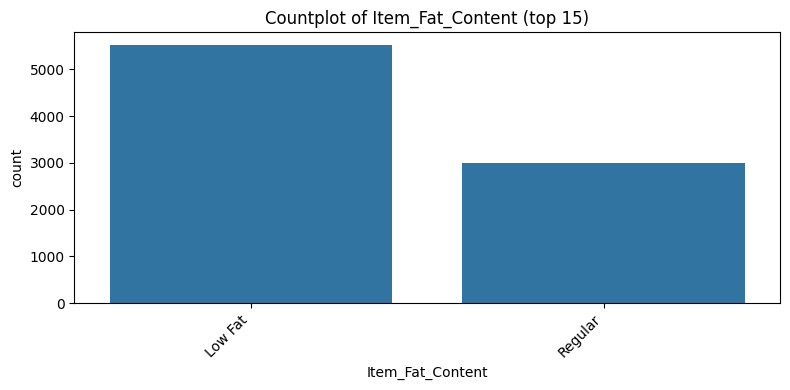

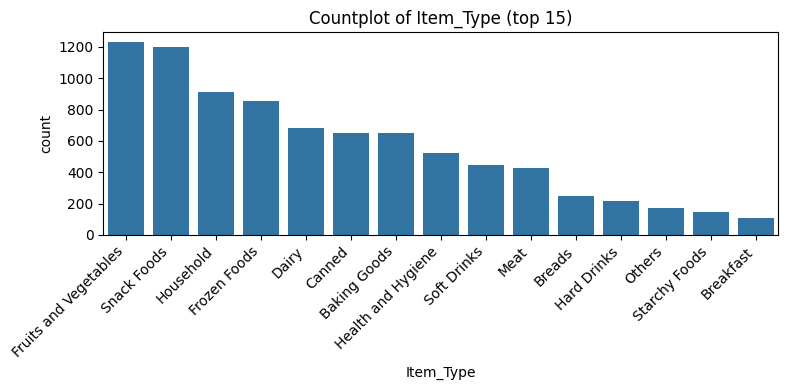

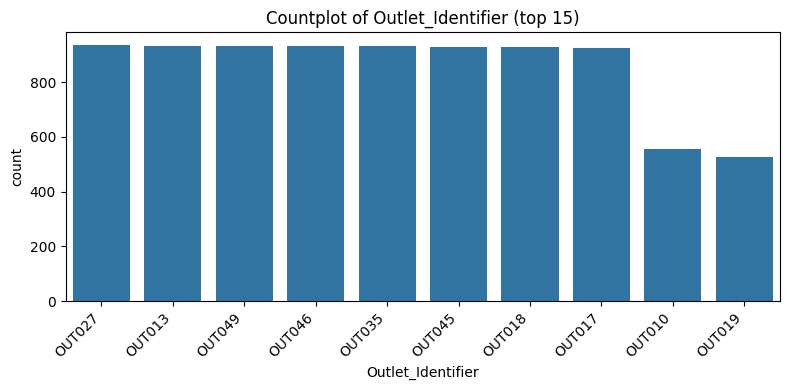

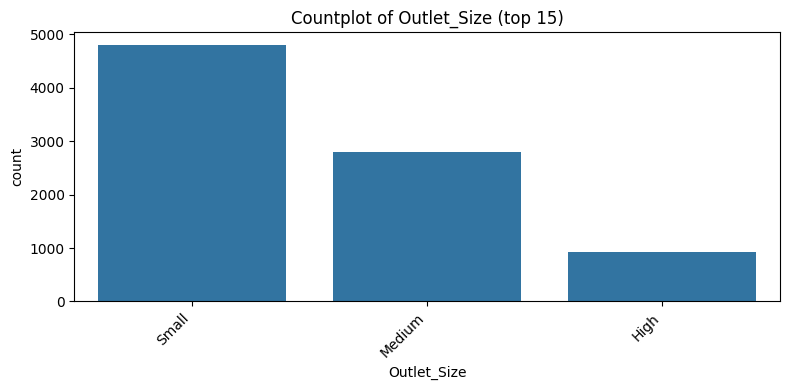

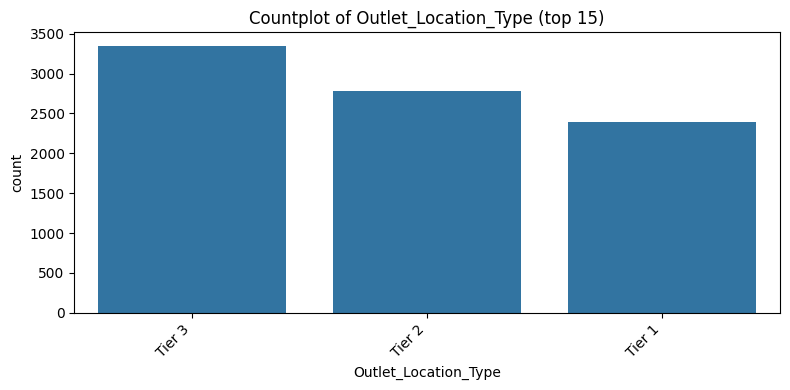

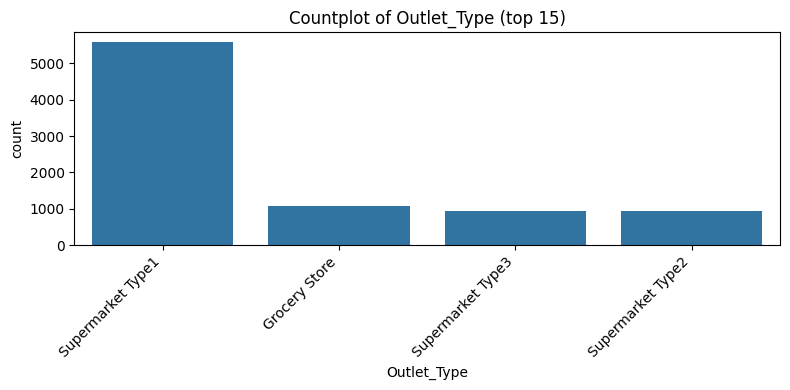

In [144]:
for col in cat_cols:
    plot_category_counts(df, col)